In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


flight = pd.read_csv("International_Report_Passengers.csv")

This project we chose two different but similar data sets. One was a large data set with a list of flight information, this included the time, departure and arrival at the airport, its flight number and other details. The second data set was a list of airports and their latitude and longitude and the airport apt which is the three- or four-letter code that only that airport has. We knew we wanted to create a visualization using the mapping program in Observable. We used João Ricardo original code from his own work on flight visualization and reworked it with our own data set to show a world map of all the different airports. So, this is a link to the observable which has a flat world map and 3D model you can rotate to look at.

Beatrice and Dominic worked on the project together. Beatrice worked on creating the world visualization, the most common airport, and most common flight route. Dominic worked on finding the datasets and usable files, finding the most and least common years of travel, and most and least common months of travel. Beatrice and Dominic both came up with visualizations of yearly and monthly travel. 


In [10]:
flight

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2014,2014,5,14492,RDU,36,11032,CUN,148,19534,AM,0,Passengers,0,315,315
1,06/01/2007,2007,6,13204,MCO,33,16085,YHZ,951,20364,C6,0,Passengers,0,683,683
2,12/01/2005,2005,12,11433,DTW,43,10411,AUA,277,20344,RD,1,Passengers,0,1010,1010
3,04/01/2003,2003,4,13487,MSP,63,16304,ZIH,148,20204,MG,1,Passengers,0,508,508
4,12/01/2005,2005,12,12016,GUM,5,11138,CRK,766,20312,TZ,1,Passengers,0,76,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680980,10/01/2015,2015,10,12478,JFK,22,12972,LHR,493,19540,BA,0,Passengers,130217,0,130217
680981,09/01/2014,2014,9,12478,JFK,22,12972,LHR,493,19540,BA,0,Passengers,132052,0,132052
680982,10/01/2014,2014,10,12478,JFK,22,12972,LHR,493,19540,BA,0,Passengers,132822,0,132822
680983,08/01/2014,2014,8,12478,JFK,22,12972,LHR,493,19540,BA,0,Passengers,134263,0,134263


This portion counts the amount of times the airport appears on both arrivals and departures as that was our initial problem making sure we counted each airport every time so we solved this by counting both columns and then combining the data to get the total amount of times that airport had a flight.

In [4]:

# This counts departures from each airport
departures = flight['usg_apt'].value_counts().reset_index()
departures.columns = ['Airport', 'DepartureCount']

# THis counts arrivals at each airport
arrivals = flight['fg_apt'].value_counts().reset_index()
arrivals.columns = ['Airport', 'ArrivalCount']

# This merges the counts from departure and arrival into a single DataFrame
total_flights = pd.merge(departures, arrivals, on='Airport', how='outer').fillna(0)
total_flights['TotalFlights'] = total_flights['DepartureCount'] + total_flights['ArrivalCount']

# Airport with the most flights
busiest_airport = total_flights[total_flights['TotalFlights'] == total_flights['TotalFlights'].max()]

print(total_flights)  # Displays the total flights for each airport
print("Busiest Airport:")
print(busiest_airport)  # Display the busiest airport

     Airport  DepartureCount  ArrivalCount  TotalFlights
0        JFK         64122.0           0.0       64122.0
1        MIA         61939.0           0.0       61939.0
2        LAX         47760.0           0.0       47760.0
3        ORD         34952.0           0.0       34952.0
4        EWR         33024.0           0.0       33024.0
...      ...             ...           ...           ...
2135     TYL             0.0           1.0           1.0
2136     SXU             0.0           1.0           1.0
2137     RKT             0.0           1.0           1.0
2138     PUG             0.0           1.0           1.0
2139     SHB             0.0           1.0           1.0

[2140 rows x 4 columns]
Busiest Airport:
  Airport  DepartureCount  ArrivalCount  TotalFlights
0     JFK         64122.0           0.0       64122.0


Busiest Routes: This bit identifies the most frequently traveled routes between airports by analyzing combinations of departure and arrival airports and counting those flights and then reports back the most traveled one.

In [5]:
busiest_routes = flight.groupby(['usg_apt', 'fg_apt']).size().reset_index(name='FlightCount')

# This finds the most frequesnt root by counting the flights from one airport to another.
most_frequent_route = busiest_routes[busiest_routes['FlightCount'] == busiest_routes['FlightCount'].max()]

print("Busiest Routes:")
print(busiest_routes.sort_values(by='FlightCount', ascending=False))  # Display all routes sorted by flight count so buisiest at the top
print("\nMost Frequent Route:")
print(most_frequent_route)  # Display the most frequent route

Busiest Routes:
      usg_apt fg_apt  FlightCount
9117      LAX    NRT         2841
12449     ORD    YYZ         2103
9086      LAX    MEX         2069
8333      JFK    LHR         2041
6640      HNL    NRT         1922
...       ...    ...          ...
5817      FPR    NAS            1
5819      FPR    YHZ            1
5820      FPR    YTM            1
5821      FPR    YUL            1
8912      LAW    NBW            1

[17824 rows x 3 columns]

Most Frequent Route:
     usg_apt fg_apt  FlightCount
9117     LAX    NRT         2841


This portion adds counts the flights by years and by months and then graphs it Beatrice did years Dominic did months. The years not so surprising as we see befor covid(2018) flights were at an all time high before dropping to the lowest ever.

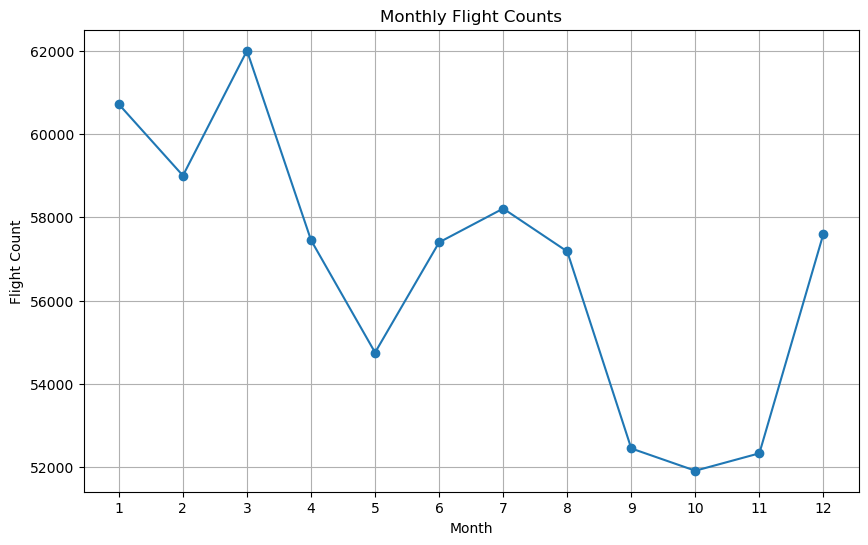

In [14]:
def mth_count(pass_report, Month):
    counts = pass_report['Month'].value_counts().reset_index()
    counts.columns = ['Number', 'Occurrences']
    return counts

month_count = mth_count(flight, 'Month').sort_values(by='Number', ascending=True)
# Plotting to visualize seasonal trends

plt.figure(figsize=(10, 6))
plt.plot(month_count['Number'], month_count['Occurrences'], marker='o')
plt.title('Monthly Flight Counts')
plt.xlabel('Month')
plt.ylabel('Flight Count')
plt.xticks(month_count['Number'])  # Set x-axis ticks as months
plt.grid(True)
plt.show()

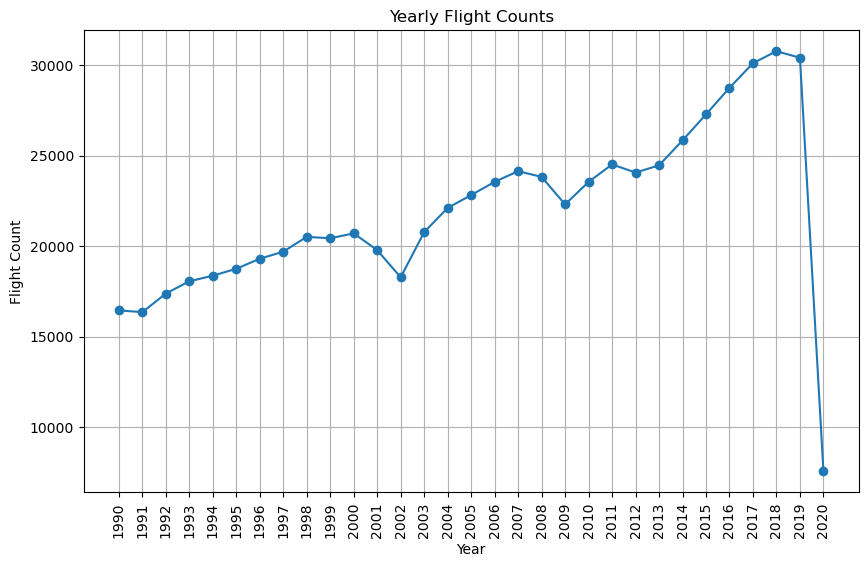

In [13]:
year_flight_counts = flight.groupby('Year').size().reset_index(name='FlightCount')

# Plotting to visualize seasonal trends

plt.figure(figsize=(10, 6))
plt.plot(year_flight_counts['Year'], year_flight_counts['FlightCount'], marker='o')
plt.title('Yearly Flight Counts')
plt.xlabel('Year')
plt.ylabel('Flight Count')
plt.xticks(year_flight_counts['Year'])  # Set x-axis ticks as months
plt.xticks(rotation=90) 
plt.grid(True)
plt.show()